**CAPSTONE PROJECT**

SKINCARE RECOMMENDATION

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# CountVectorizer+tfidfTransformer = tfidfVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show,curdoc,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,Select,Paragraph,TextInput
from ipywidgets import interact

import string
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
file_path = '/content/drive/My Drive/Capstone_Project/skindataall.csv'
skincare = pd.read_csv(file_path)

In [ ]:
skincare.head()

,Unnamed: 0,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [ ]:
skincare.tail()

,Unnamed: 0,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
8644,8698,Tinkfairy,Fair,Combination,Hazel,Brunette,5,I was looking for a overnight serum with retin...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3127,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['wa', 'looking', 'overnight', 'serum', 'retin...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8645,8699,baeyonce,Light,Combination,Blue,Blonde,5,I have never experienced such fast results in ...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3616,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['never', 'experienced', 'fast', 'result', 'li...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8646,8700,JustJC,Dark,Combination,Brown,Black,5,Holy grail product for me! Everyone can tell w...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1464,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['holy', 'grail', 'everyone', 'tell', 'using']",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8647,8701,Latchmi,No data,No data,No data,No data,5,I love this product very much. Very much ! Exp...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1733,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['love', 'much', 'much', 'expensive', 'amazing...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8648,8702,xc1148,No data,No data,No data,No data,5,I have tried a million creams and treatments f...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,6824,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['tried', 'million', 'cream', 'treatment', 'fa...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."


ASSESING DATA

In [ ]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8649 non-null   int64  
 1   Username             8649 non-null   object 
 2   Skin_Tone            8649 non-null   object 
 3   Skin_Type            8649 non-null   object 
 4   Eye_Color            8649 non-null   object 
 5   Hair_Color           8649 non-null   object 
 6   Rating_Stars         8649 non-null   int64  
 7   Review               8649 non-null   object 
 8   Product              8649 non-null   object 
 9   Brand                8649 non-null   object 
 10  Price                8649 non-null   int64  
 11  Rating               8649 non-null   float64
 12  Ingredients          8649 non-null   object 
 13  Combination          8649 non-null   int64  
 14  Dry                  8649 non-null   int64  
 15  Normal               8649 non-null   i

In [ ]:
skincare.isna().sum()

,0
Unnamed: 0,0
Username,0
Skin_Tone,0
Skin_Type,0
Eye_Color,0
Hair_Color,0
Rating_Stars,0
Review,0
Product,0
Brand,0


In [ ]:
print('Jumlah duplikasi: ', skincare.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
skincare.describe()

,Rating_Stars,Price,Rating,Combination,Dry,Normal,Oily,Sensitive,User_id,Product_id,Good_Stuff
count,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000
mean,4.101861,47.289860,4.290982,0.661579,0.567927,0.636952,0.617644,0.515320,3429.434732,155.091224,0.619262
std,1.362036,35.774619,0.470872,0.473200,0.495393,0.480906,0.485991,0.499794,1987.197060,91.736755,0.485596
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,28.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1696.000000,73.000000,0.000000
50%,5.000000,38.000000,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000,3437.000000,155.000000,1.000000
75%,5.000000,58.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,5158.000000,236.000000,1.000000
max,5.000000,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6890.000000,314.000000,1.000000


DATA CLEANING

In [ ]:
#menghapus kolom eye color, hair color

skincare_cleaned = skincare.drop(['Eye_Color', 'Hair_Color'], axis = 1)

In [ ]:
#mengganti nilai no data pada skin type
skincare['Skin_Type'] = skincare['Skin_Type'].replace({'No data': 'Normal'})

EDA

In [ ]:
counts_brand = skincare['Brand'].value_counts()
count_percentage = skincare['Brand'].value_counts(1)*100
counts_dfbrand = pd.DataFrame({'Brand':counts_brand.index,'Counts':counts_brand.values,'Percent%':np.round(count_percentage.values,2)})
top_10_brands = counts_dfbrand.head(10)
top_10_brands

,Brand,Counts,Percent%
0,CLINIQUE,685,7.92
1,MURAD,595,6.88
2,KIEHL'S SINCE 1851,478,5.53
3,FRESH,454,5.25
4,CAUDALIE,383,4.43
5,OLEHENRIKSEN,359,4.15
6,KATE SOMERVILLE,310,3.58
7,PETER THOMAS ROTH,288,3.33
8,SEPHORA COLLECTION,280,3.24
9,ORIGINS,264,3.05


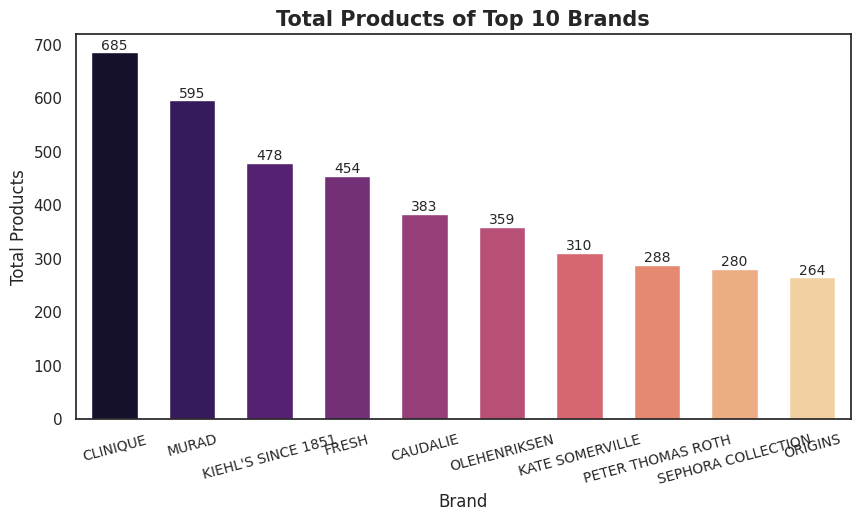

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style='white')
ax = sns.barplot(x='Brand', y='Counts', width = 0.6, data=top_10_brands, palette='magma')
ax.set_title('Total Products of Top 10 Brands', fontsize=15, fontweight='bold')
ax.set_xlabel('Brand', fontsize=12, fontweight='medium')
ax.set_ylabel('Total Products', fontsize=12, fontweight='medium')

for label in ax.containers:
    ax.bar_label(label, fontweight='medium', fontsize=10)
plt.xticks(rotation = 15, fontsize=10)
plt.show()

In [ ]:
# Skin Type That Suitable For the Product
counts = skincare['Skin_Type'].value_counts()
count_percentage = skincare['Skin_Type'].value_counts(1)*100
counts_df = pd.DataFrame({'Skin_Type':counts.index,'Counts':counts.values,'Percent%':np.round(count_percentage.values,2)})
counts_df

,Skin_Type,Counts,Percent%
0,Combination,3567,41.24
1,Normal,2898,33.51
2,Dry,1223,14.14
3,Oily,961,11.11


In [ ]:
skintype_stats=skincare.groupby('Skin_Type')['Username'].count()

<Axes: xlabel='Skin_Type'>

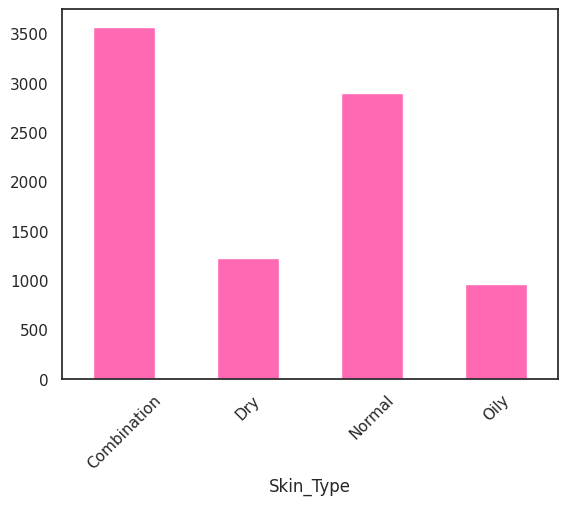

In [ ]:
skintype_stats.plot.bar(color='hotpink',rot=45)

<Axes: xlabel='Rating_Stars'>

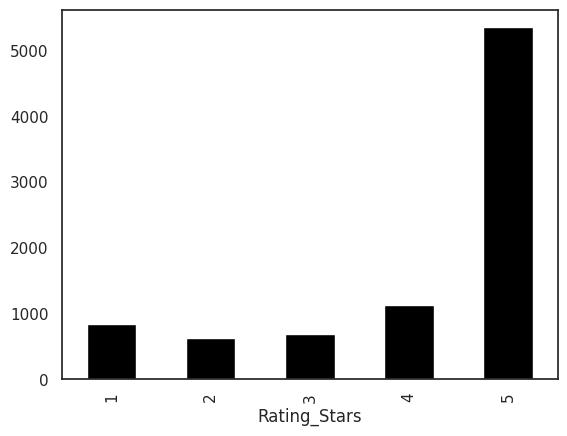

In [ ]:
rating_stats = skincare.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black')

In [ ]:
# Checking product type

pd_type = pd.DataFrame()
pd_type["Count"] = skincare["Category"].value_counts()
pd_type["Count%"] = skincare["Category"].value_counts()/skincare.shape[0]*100
pd_type

,Count,Count%
Category,,
Cleanser,4117,47.600879
Moisturizer,2560,29.598798
Treatment,1948,22.522835
Face Mask,24,0.277489
